# Matematika, fizika i glazba: intervali i frekvencije

Interval u glazbenoj teoriji je razmak između dva tona:
1. Pima (čista) - jedan ton
2. Sekunda (mala, velika) - razmak od dva tona (ukljućujući prvi)
3. Terca (mala, velika) - razmak od tri tona
4. Kvarta (čista, povećana) - razmak od četiri tona 
5. Kvinta (čista, smanjena) - razmak od pet tonova 
6. Seksta (mala, velika) - razmak od šest tonova 
7. Septima (mala, velika) - razmak od sedam tonova
8. Oktava (čista) - razmak od osam tonova

Intervale dijelimo na: 
1. konsonantne (zvuče skladno, ne traže rješenje) - svi čisti intervali, velika i mala terca i seksta
2. disonantne (ne zvuče skladno, izazivaju napetost, traže rješenje) - svi smanjeni, povećani intervali, velika i mala sekunda i septima

Pitagora je eksperimentirao s duljinom žice glazbenog instrumenta i otkrio da su dva tona konsonantna  ako su u omjeru "malih prirodnih brojeva". Ustanovio je da kad se žica smanji na pola, u omjeru $1:2$, visina tona se povisi za interval oktavu, kad se žica smanji u omjeru $2:3$ visina tona se povisi za interval čistu kvintu, a omjer $3:4$ daje interval čistu kvartu. 

Ton *A1* je standarni ton za ugađanje koji po dogovoru iznosi $440 Hz$.
Generiranje sinusnog tona *A1*:

In [1]:
import numpy as np
import IPython.display as ipd
sr = 22050 
T = 2.0
t = np.linspace(0,T,int(T*sr),endpoint=False)
def sinusoida(A,f,t):
    return A*np.sin(2*np.pi*f*t)
x = sinusoida(0.5,440,t)
ipd.Audio(x,rate=sr) # osnovni ton A

Tonovi *A1* i ton čija je frekvencija $2\cdot440 Hz$ zajedno čine interval oktavu:

In [2]:
y1 = sinusoida(0.5,2*440,t)
ipd.Audio([x, y1],rate=sr) # oktava

Prikaz grafova tih tonova te njihovih sjecišta na x-osi kako bi jasnije vidjeli odnos njihovih valnih duljina pa i frekvencija:

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def crtajsinusoide(v1,v2,s):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xlabel('vrijeme(s)')
    ax.set_ylabel('trenutna amplituda vala')
    ax.set_title(s)
    ax.plot(t,v1)
    ax.plot(t,v2)
    ax.set_xlim(-0.001,0.021)
    ax.grid()
    return

def findIntersection(fun1,fun2,frek1,frek2,x0):
    return fsolve(lambda x : fun1(0.5,frek1,x) - fun2(0.5,frek2,x),x0)

def crtajpresjek(fun1,fun2,frek1,frek2):
    x=0
    eps=10**(-10)
    for i in range(50):
        result = findIntersection(fun1,fun2,frek1,frek2,x)
        x+=1/(2*frek1)
        if(np.absolute(sinusoida(0.5,frek1,result)) < eps):
            plt.plot(result,0,'bo')
    return

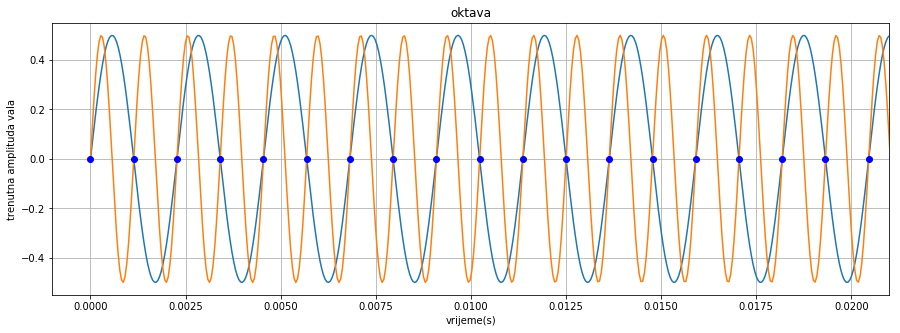

In [4]:
crtajsinusoide(x,y1,"oktava")
crtajpresjek(sinusoida,sinusoida,440,880)

Audio i vizualni prikaz tona *A1* i tona čija je frekvencija $\frac{3}{2}\cdot440Hz$, ti tonovi čine čistu kvintu:

In [5]:
y2 = sinusoida(0.5,3/2*440,t)
ipd.Audio([x, y2],rate=sr) # čista kvinta

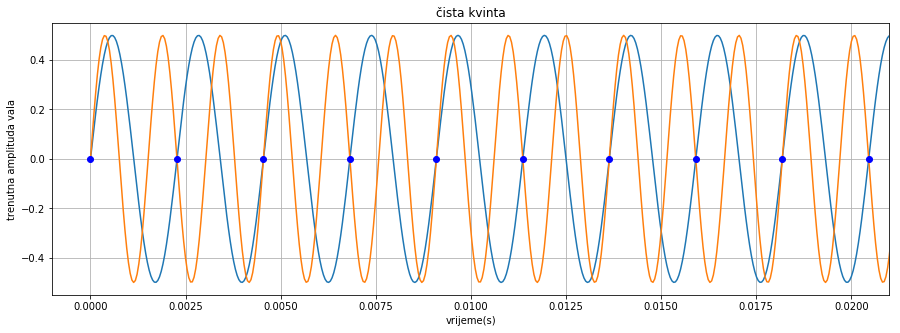

In [6]:
crtajsinusoide(x,y2,"čista kvinta")
crtajpresjek(sinusoida,sinusoida,440,3/2*440)

Audio i vizualni prikaz tona *A1* i tona čija je frekvencija $\frac{4}{3}\cdot440Hz$, ti tonovi čine čistu kvartu:

In [7]:
y3 = sinusoida(0.5,4/3*440,t)
ipd.Audio([x, y3],rate=sr) # čista kvarta

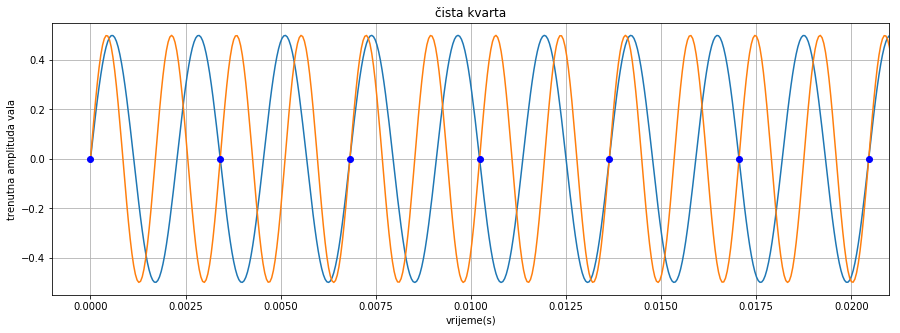

In [8]:
crtajsinusoide(x,y3,"čista kvarta")
crtajpresjek(sinusoida,sinusoida,440,4/3*440)

Audio i vizualni prikaz tona *A1* i tona čija je frekvencija $\frac{729}{512}\cdot440Hz$, ti tonovu čine povećanu kvartu koja je disnonantni interval.

In [9]:
y4 = sinusoida(0.5,729/512*440,t)
ipd.Audio([x, y4],rate=sr) # povećana kvarta - primjer disonantnog intervala

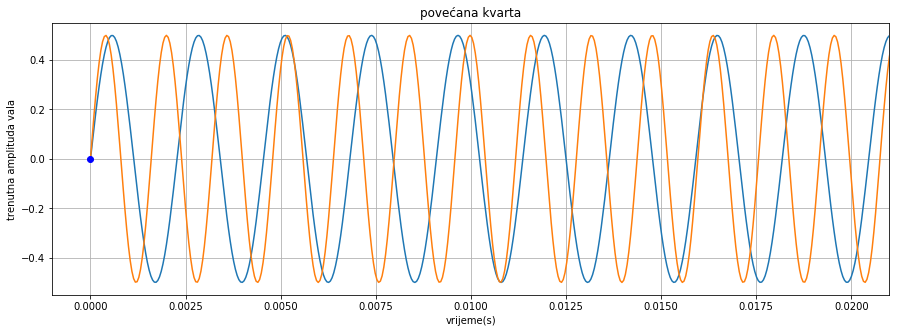

In [10]:
crtajsinusoide(x,y4,"povećana kvarta")
crtajpresjek(sinusoida,sinusoida,440,729/512*440)

Definicija glazbene ljestvice s gledišta fizike: ljestvica je niz glazbenih tonova rastućih frekvencija zadanih omjera, pritom je ukupni raspon glazbenih tonova podijeljen u oktave.

Dur i mol ljestvice koje se koriste u klasičnoj glazbi sadrže 8 tonova, razmaci između dva tona nazivaju se stepeni - mogu biti cijeli ili polustepeni. Unutar jedne oktave (npr *C1* i *C2*) je 12 polustepena.
Promotrimo *C*-dur ljestvicu na klavijaturi: *C, D, E, F, G, A, H, C*. Razmak između *C* i *D* je cijeli stepen (između njih je crna tipka), a razmak između *E* i *F* je polustepen (između nema tipke).
Promotrimo sada npr. *E*-dur ljestvicu: *E, Fis, Gis, Ais, H, Cis, Dis, E*. Ona na istim mjestima ima cijele stepene i polustepene kao *C*-dur pa i sve dur ljestvice. Mjesta na kojima su cijeli stepeni i polustepeni se razlikuju u dur i mol ljestvicama. 


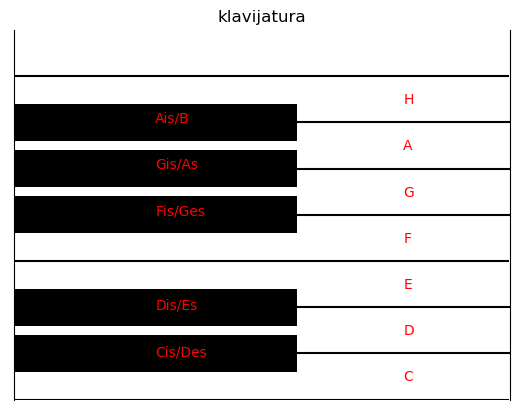

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_os = np.arange(8)
x_os = [0,4,4,0,4,4,4,0]
linije = 7
tonovi1 = ["C","D","E","F","G","A","H"]
tonovi2 = ["Cis/Des","Dis/Es","Fis/Ges","Gis/As","Ais/B"]

ax.barh(y_os, x_os, xerr=linije, color='black', ecolor='black')
ax.set_title('klavijatura')
ax.set_xlim(0,7)
ax.set_ylim(0,8)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom="off", left="off")
ax.set_yticklabels([])
ax.set_xticklabels([])
k=0.4
for t in tonovi1:
    ax.text(5.5,k,t,color='red')
    k+=1
k=0.95
for i in range(2):
    ax.text(2,k,tonovi2[i],color='red')
    k+=1
k=4
for i in range(2,5):
    ax.text(2,k,tonovi2[i],color='red')
    k+=1

Pitanje koje se postavlja je kako dobiti frekvencije svih tonova ljestvice. U 13. stoljeću francuska je akademija Notre Dame proglasila kako se do točne ljestvice može doći korištenjem samo Pitagorinih savršenih kvinti i oktava.
Svi tonovi mogu se dobiti jednostavnim matematičkim postupkom koji koristi dvije činjenice: ako osnovni ton ima frekvenciju $f$, tada kvinta gore ima frekvenciju $\frac{3}{2}\cdot f$, a oktava gore $2\cdot f$. Neka je *C* prvi ton u ljestvici i označimo njegovu frekvenciju s $f$. Tada je frekvencija tona *G* jednaka $\frac{3}{2}\cdot f$. Sljedeća kvinta je ton *D* čija je frekvencija $\frac{3}{2}\cdot\frac{3}{2}\cdot f=\frac{9}{4}\cdot f$, no prešli smo u drugu oktavu pa ga moramo spustiti: $\frac{9}{4}\cdot f:2=\frac{9}{8}\cdot f$. Sljedeća kvinta je ton *A* koji iznosi $\frac{3}{4}\cdot\frac{9}{8}\cdot f=\frac{27}{32}\cdot f$. Nastavljajući postupak možemo doći do svih 12 tonova unutar oktave. Uzet ćemo da je frekvencija tona *C* jedinična i izračunati frekvencije svih 12 tonova:

In [12]:
import pandas as pd
from fractions import Fraction as F
alphabet = "CDEFGAHises/B"
tonovi = tonovi1 + tonovi2
tonovi = sorted(tonovi, key=lambda word: [alphabet.index(c) for c in word])
frek = [F(1,1)]
for i in range(11):
    frek.append(frek[i]*3/2)
    if (frek[i+1] > 2*frek[0]):
        frek[i+1] = frek[i+1] / 2
frek.append (2 * frek[0])
frek.sort()
pd.DataFrame({'Frekvencije(Hz)' : frek},index=tonovi+["C"])

,Frekvencije(Hz)
C,1
Cis/Des,2187/2048
D,9/8
Dis/Es,19683/16384
E,81/64
F,177147/131072
Fis/Ges,729/512
G,3/2
Gis/As,6561/4096
A,27/16


Ovakva ljestvica nema jednake polutonove i dobro zvuči u tonalitetu prema kojem je ugođena, no ako bismo htjeli svirati u drugom tonalitetu na ovako ugođenom klaviru, to ne bi lijepo zvučalo.
U povijesti je bilo još mnogo načina ugađanja sve dok nije standardizirano jednoliko ugađanje u kojem svi polutonovi imaju jednaku frekvenciju:
$f=440\cdot2^\frac{n}{12}$ pri čemu je $n=0$ za ton *A1* i svakom tonu pripada odgovarajući cijeli broj. U takvom ugađanju više nemamo "savršene" kvinte, ali puno je praktičnije.

Graf funkcije frekvencija i tablica frekvencija tonova u četiri oktave:

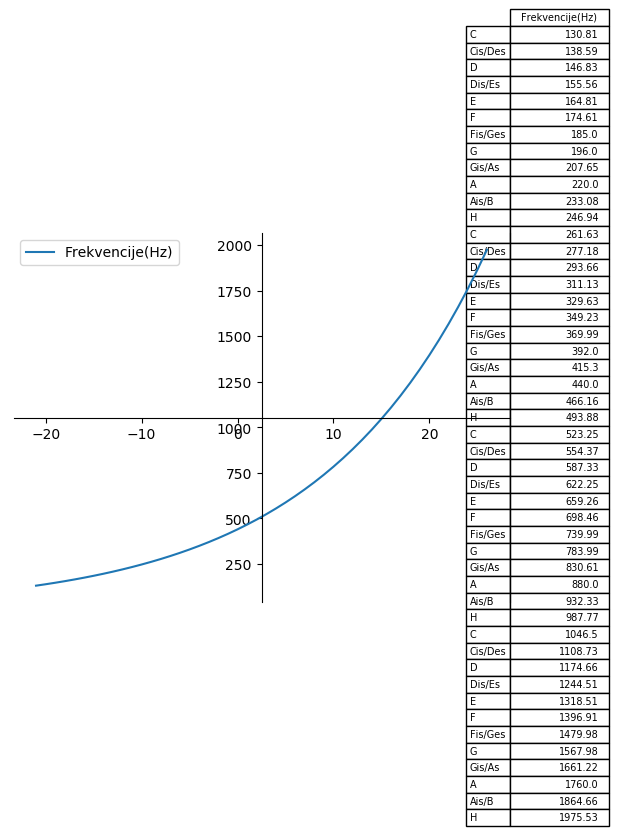

In [13]:
def frek(n):
    return 440*2**(n/12)
n = np.arange(-21, 27)
f = frek(n)
df = pd.DataFrame({'Frekvencije(Hz)' : f},index = tonovi*4)

fig, ax = plt.subplots()
pd.plotting.table(ax, np.round(df, 2), loc='right', colWidths=[0.2])
df.plot(ax=ax,x=n)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)

Pitagorinu teoriju o konsonantnim intervalima je objasnio Galileo: konsonantost intervala čine pravilni "pulsevi" koji odgovaraju sjecištima valova prikazanih gore. No, ta teorija je kasnije opovrgnuta. 1965. Plomp i Levet su proveli eksperiment u kojem su zatražili netrenirane slušače da ocijene disonantnost intervala kreiranih od **čistih sinusnih tonova.** Pustili su jedan ton fiksne frekvencije i frekvenciju drugog tona su postupno povećavali.
Tim eksperimentom su potvrdili teoriju koju je Helmholtz objavio gotovo stoljeće prije njih.

Pogledajmo prvo jednu od parametrizacija krivulje koju su dobili eksperimentom.
Formula za disonatnost između dva sinusna tona: $d(f_1,f_2)=exp(-3.5\cdot s \cdot (f_2-f_1))-exp(-5.75\cdot s \cdot (f_2-f_1))$,
$s=\frac{0.24}{0.021\cdot f1+19}$ gdje su $f_1$ i $f_2$ frekvencije čistih sinusnih tonova.

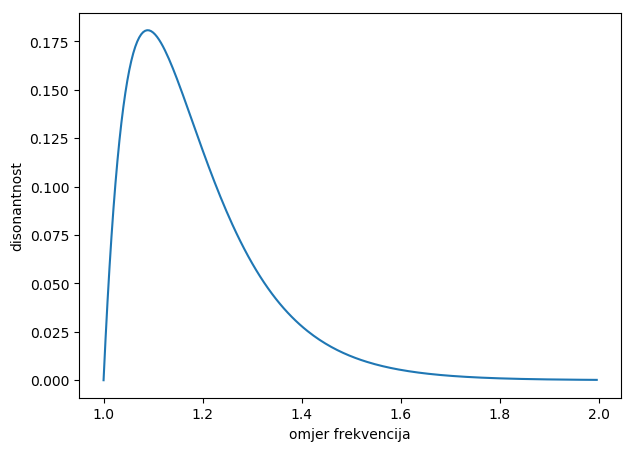

In [14]:
def plomp(f1,f2):
    fmin=min(f1,f2)
    fmax=max(f1,f2)
    s=0.24/(0.021*fmin+19.)
    return (np.exp(-3.5*s*(fmax-fmin))-np.exp(-5.75*s*(fmax-fmin)))
 
frek = np.arange(250.,500.,1.)
krivulja = np.zeros((len(frek)))
 
for i,f in enumerate(frek):
    krivulja[i] = plomp(250.,f)
    
frek=frek/250

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(frek,krivulja)
ax.set(xlabel="omjer frekvencija", ylabel="disonantnost")
plt.show()

Vidimo da je disonantnost najveća kod intervala sekunde i zatim se smanjuje prema oktavi. Razlika disonantosti kod intervala oktave i septime je vrlo mala, a septima se inače smatra disonatnim intervalom.
Helmholtz je to objasnio ovako: 
Kad su sinusni valovi vrlo blizu po iznosu frekvencije čuju se kao jedan ugodan ton. Malo dalje nastaju ubrzani udari koji uzrokuju disonantnost. Zatim se frekvencije udaljuju i čujemo dva tona koja nam zvuče konsonantno.


Sinusni ton u prirodi ne srećemo, možemo ga samo elektronski generirati. Zanimaju nas tzv. glazbeni tonovi koje proizvode glazbeni instrumenti. Oni su složeni i možemo ih rastaviti na jednostavne sinusne tonove pomoću Fourierove analize. Pogledajmo kako izgleda graf zvuka flaute koja proizvodi ton *A1*:

In [15]:
ipd.Audio('flauta.wav') 

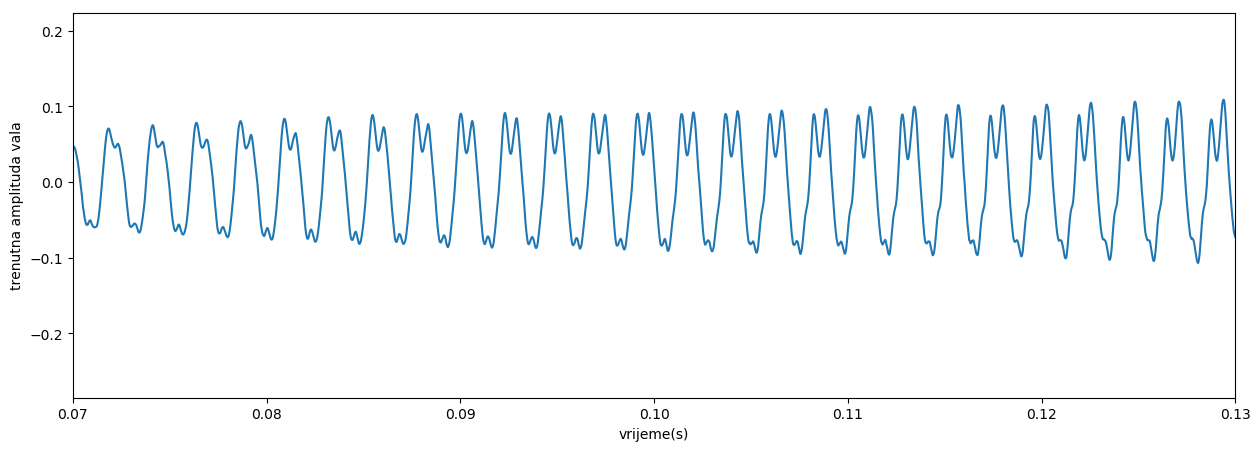

In [16]:
from scipy.io import wavfile

sr, snd = wavfile.read('flauta.wav')
snd = snd / (2.**15) ##da brojevi budu između -1 i 1
t = np.arange(0, np.shape(snd)[0], 1)
t = t / sr

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('vrijeme(s)')
ax.set_ylabel('trenutna amplituda vala')
ax.plot(t,snd)
ax.set_xlim(0.07,0.13)
plt.show()

Spektar složenih tonova sastoji se od više frekvencijskih komponenti za razliku od sinusnog koji ima samo jednu. Razlikujemo harmonijske i neharmonijske složene tonove. Harmonijski su npr. tonovi koji proizvode gitara, klavir, violina, flauta, dok je tipičan primjer neharmonijskog tona zvuk udara u metalnu pločicu. Mnogi instrumenti drugih kultura koji nama zvuče neuobičajeno tvore neharmonijske tonove.
Frekvencijske komponente harmonijskog tona nazivaju se harmonici i njihova frekvencija je približno jednaka višekratnicima osnovnog harmonika. Visina tona je određena frekvencijom osnovnog harmonika. Primjer spektra harmonijskog tona visine 200 Hz:

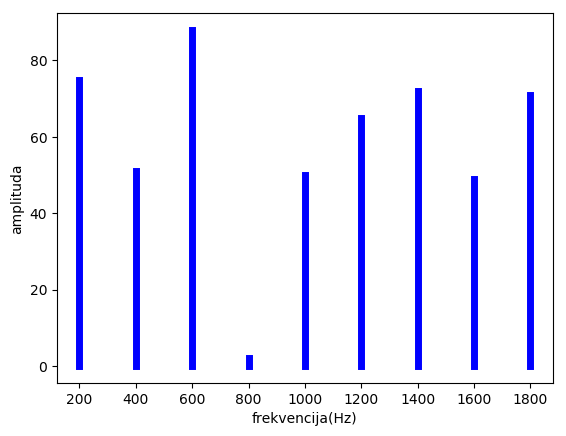

In [17]:
from random import randint
x=np.arange(200,2000,200)
y=[]
for i in range(len(x)):
    y.append(randint(0,100))
    plt.plot([x[i],x[i]],[0,y[i]],linewidth=5,c='blue')
plt.xticks(x)
plt.ylabel('amplituda')
plt.xlabel('frekvencija(Hz)')
plt.show()

Za razliku od harmonijskog, u spektru frekvencija neharmonijskog tona nisu višekratnici osnovne frekvencije.

Preostaje objasniti disonantnost i konsonatnost između složenih tonova.
Helmholtz je predložio sljedeću proceduru: zbrojiti disonance između svih parova sinusnih tonova od kojih su sastavljeni složeni i dobit ćemo ukupnu disonantnost složenih tonova. Drugim riječima, ako je spektar prvog složenog tona $\{f_1, f_2, f_3...\}$, a drugog $\{g_1, g_2, g_3...\}$ ukupna disonantnost dana je s $ D=\sum_{i,j} d(f_i,g_j)$

lokalni minimumi su [1.2   1.252 1.332 1.5   1.668 1.768]


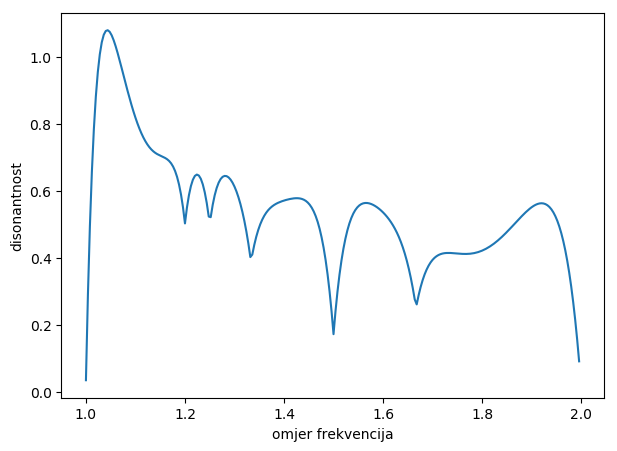

In [18]:
from scipy.signal import argrelextrema

def disonantnost(tonovi): ##tonovi su matrica dimenzije 2 x frek
    nfrek = tonovi.shape[1]
    c = 0.0
    for i in range(nfrek):
        for j in range(nfrek):
            c = c+plomp(tonovi[0][i],tonovi[1][j])
    return c
tonovi = np.zeros((2,6))
frek = np.arange(250.,500.,1.)
krivulja = np.zeros((len(frek)))
for i,f in enumerate(frek):
    for j in range(6):
        tonovi[0,j] = 250.*(j+1)
        tonovi[1,j] = f*(j+1)
    krivulja[i] = disonantnost(tonovi)
frek = frek/250
minind = argrelextrema(krivulja, np.less) ##traženje lokalnih minimuma
for i in minind:
    print("lokalni minimumi su",frek[i])
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(frek,krivulja)
ax.set(xlabel="omjer frekvencija", ylabel="disonantnost")
plt.show()

Minimumi disonantnosti odgovaraju intervalima prime, male i velike terce, čiste kvarte i kvinte, velike sekste i oktave.
Ti minimumi se poklapaju s konsonantnim intervalima u klasičnoj glazbi.

Pogledajmo kako izgleda takva krivulja za neharmonijske tonove, uzete su frekvencije tonova marimbe:

lokalni minimumi su [1.416 1.652 1.796 1.96  2.276 2.756 3.24 ]


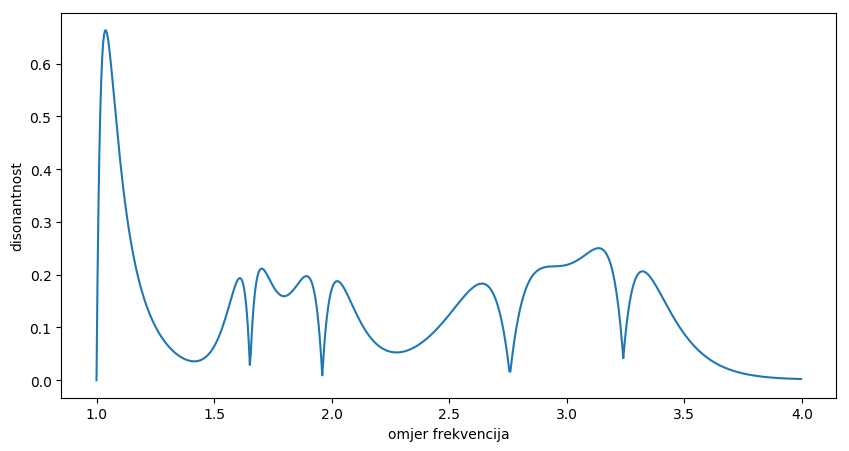

In [19]:
frek = np.arange(250.,1000.,1.)
krivulja = np.zeros((len(frek)))
tonovi = np.zeros((2,4))
for i,f in enumerate(frek):
    tonovi[0] = [250.,250.*2.758,250.*5.406,250.*8.936]
    tonovi[1] = [f,f*2.758,f*5.406,f*8.936]
    krivulja[i] = disonantnost(tonovi)
frek = frek/250
minind = argrelextrema(krivulja, np.less) ##traženje lokalnih minimuma
for i in minind:
    print("lokalni minimumi su",frek[i])
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(frek,krivulja)
ax.set(xlabel="omjer frekvencija", ylabel="disonantnost")
plt.show()

Ovdje se minimumi ne poklapaju s klasičnim konsonantnim intervalima.

Danas neki moderni glazbenici skladaju s neouobičajenim, neharmonijski zvukovima. Procedura je sljedeća:
1. Izabrati zvuk
2. Naći spektar zvuka
3. Pojednostaviti taj spektar
4. Naći krivulju disonantnosti
5. Odabrati intervale iz minimuma krivulje i povezanu ljestvicu
6. Napraviti instrument koji može svirati te tonove
7. Skladati i pustiti skladbu


### Zaključak

Možemo reći da su disonantnost i konsonantnost funkcije intervala i spektra tona. Ljestvica i spektar su povezani ako krivulja disonantnosti ima minimume u tonovima ljestvice. Harmonijski spektar klasičnih instrumenata je povezan s klasičnim ljestvicama jer ima Pitagorejske intervale u minimumima. Neharmonijski spektar drugih glazbenih tradicija je povezan s njihovim ljestvicama. Intervale koje poznajemo i koristimo su posljedica zvukova instrumenata koji su se razvili u našoj kulturi, a ne "čarobnog" zakona malih brojeva.